## 전국 신규 민간 아파트 분양가격 동향

- 기간
- 주택분양보증을 받아 분양한 전체 민간 신규 아파트 분양가격 동향
- https://www.data.go.kr/dataset/3035522/file.Data.do
- 파이썬을 활용한 데이터 분석 방법 익히기
- 데이터 분석 도구: pandas
- 시각화 도구: grammer of graphics 문법을 활용할 수 있는 plotnine사용
- 데이터 다운로드: https://goo.gl/oJydAv

In [1]:
# 시각화 도구 설치
!pip install plotnine

In [3]:
# 시각화 도구 설치
!pip install missingno

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
import re                # 정규 표현식. regular expression
from plotnine import *

In [3]:
!pip show plotnine

# esc key 누르고 dd 두 번 누르면 셀 지워짐.

Name: plotnine
Version: 0.10.1
Summary: A grammar of graphics for python
Home-page: https://plotnine.readthedocs.io/en/stable
Author: Hassan Kibirige
Author-email: has2k1@gmail.com
License: MIT
Location: c:\users\helen\anaconda3\lib\site-packages
Requires: statsmodels, pandas, numpy, scipy, mizani, matplotlib, patsy
Required-by: 


In [1]:
# 현재 위치 정보 보기
%pwd

'C:\\Users\\helen'

In [2]:
# data 폴더 아래에 apt_price 라는 폴더를 만들어 공공데이터 포털에서 다운로드 받은 데이터를 모아 둠. 해당 파일 혹인하기
%ls data\apt_price\


# 오류: %ls data/apt_price/ 
# ---> 매개변수 포맷이 틀립니다. 
# ---> 슬래시를 역슬래시로 바꾸니 해결(윈도우에서는 역슬래시로 사용)

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: B8D9-5F49

 C:\Users\helen\data\apt_price 디렉터리

2022-11-16  오전 11:20    <DIR>          .
2022-11-16  오전 11:20    <DIR>          ..
2022-11-16  오전 11:07           108,525 전국_평균_분양가격_2018.7월_.csv
2022-11-16  오전 10:42           294,801 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20211231.csv
2022-11-16  오전 11:07             4,528 지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv
               3개 파일             407,854 바이트
               2개 디렉터리  34,497,785,856 바이트 남음


In [6]:
pre_sale = pd.read_csv('data/apt_price/전국_평균_분양가격_2018.7월_.csv', encoding='euc-kr')

# csv 파일 불러올 때는 슬래시 사용하기
# 대부분 인코딩 디폴트 값은 utf-8인데,
# 공공데이터 포털에 올라오 있는 데이터들을 인코딩이 cp949 이거나 euc-kr로 되어 있는 경우가 많다.
# 따라서 인코딩 방식을 따로 지정하지 않으면 데이터를 불러오지 못하는 경우 발생할 수 있다. 

pre_sale.shape
# 데이터의 크기 확인하기
# 총 몇 개의 데이터, 몇 개의 컬럼이 있는지 확인

(2890, 5)

In [7]:
pre_sale.head()     # 상위 5개 데이터 출력

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [8]:
pre_sale.head(10)    # 괄호 안에 몇 개의 데이터를 볼 것인지 입력해 준다.

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [9]:
pre_sale.tail()    # 하위 5개 데이터 출력

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [10]:
# 데이터 프레임에 info()를 찍어주면 데이터의 요약 정보를 볼 수 있다.
# 분양가격이 숫자 타입이 아님. 숫자 타입으로 변경해주기

pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2890 non-null   object
 1   규모구분     2890 non-null   object
 2   연도       2890 non-null   int64 
 3   월        2890 non-null   int64 
 4   분양가격(㎡)  2750 non-null   object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [11]:
pre_sale.dtypes     # info()와 달리 데이터 타입만 확인 할 수 있다.

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [12]:
pre_sale.isnull().sum()   

# isnull() 결측치가
# sum() 몇 개 있는지 계산해준다.

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
dtype: int64

In [13]:
# 폰트 설정(한글 깨짐 방지)
import matplotlib.pyplot as plt 
plt.rcParams['font.family']="Malgun Gothic"
plt.rcParams['axes.unicode_minus']=False

<AxesSubplot:>

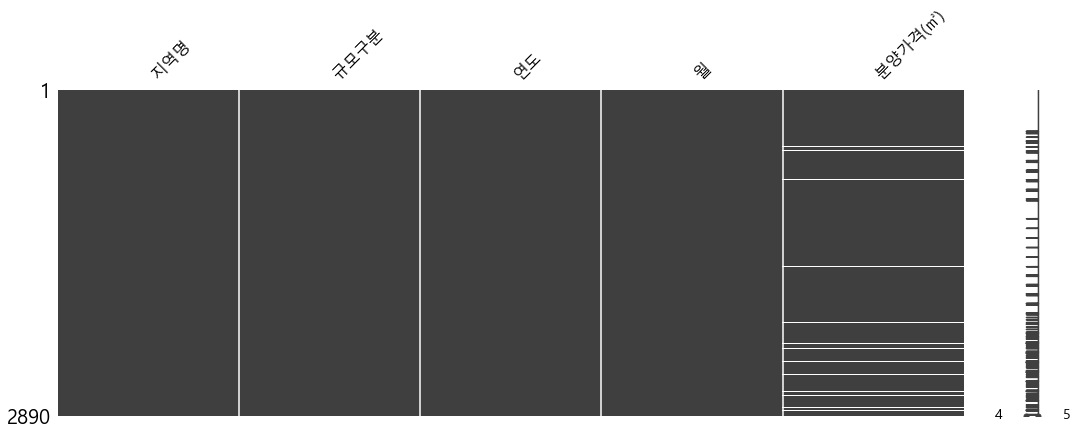

In [14]:
# 결측치 보기
import missingno as msno
msno.matrix(pre_sale, figsize=(18,6))

In [15]:
# 연도와 월은 카테고리 형태의 데이터이기 떄문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

In [16]:
pre_sale_price = pre_sale['분양가격(㎡)']

In [17]:
# 분양가격의 타입을 숫자로 변경하기
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')  # 판다스의 to_numeric을 써서 데이터 타입 숫자형으로 변경

# 평당 분양가격 구하기
pre_sale['평당분양가격'] = pre_sale['분양가격'] * 3.3

In [20]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      2890 non-null   object 
 1   규모구분     2890 non-null   object 
 2   연도       2890 non-null   object 
 3   월        2890 non-null   object 
 4   분양가격(㎡)  2750 non-null   object 
 5   분양가격     2658 non-null   float64
 6   평당분양가격   2658 non-null   float64
dtypes: float64(2), object(5)
memory usage: 158.2+ KB


In [21]:
pre_sale.dtypes

# 연도, 월을 스트링 타입으로 변경했기 때문에 연도, 월의 데이터 타입이 object로 바뀜

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)     object
분양가격       float64
평당분양가격     float64
dtype: object

In [22]:
# 분양가격 결측치 다시 확인
pre_sale.isnull().sum()


# 결측치가 더 늘어나나 것을 확인 할 수 있음
# 평당분양가격을 구하라 때 공백을 결측치가 아닌 값이 들어있는 것으로 인식
# 공백값으로 되어 있던 데이터들이 널값으로 다시 집계 됨

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    140
분양가격       232
평당분양가격     232
dtype: int64

In [24]:
pre_sale.describe()   

# 데이터 요약하기
# describe()는 데이터 타입이 int나 float으로 되어있는 데이터를 디폴트로 가져온다.
# 평당분양가격: 분양가격 * 3.3

,분양가격,평당분양가격
count,2658.000000,2658.000000
mean,3063.297216,10108.880813
std,1112.743769,3672.054436
min,1868.000000,6164.400000
25%,2348.000000,7748.400000
50%,2743.000000,9051.900000
75%,3293.750000,10869.375000
max,8098.000000,26723.400000


In [27]:
pre_sale.describe?   # describe의 도움말을 볼 수 있다.

SyntaxError: invalid syntax (2642490829.py, line 1)

In [26]:
pre_sale.describe(include=[np.object])   # 지역명은 랜덤하게 나온다

,지역명,규모구분,연도,월,분양가격(㎡)
count,2890,2890,2890,2890,2750
unique,17,5,4,12,1305
top,서울,전체,2016,10,2221
freq,170,578,1020,255,17


In [29]:
# 2017년 데이터만 보기
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017'] # 데이터 타입이 object타입이기 때문에 스트링 형태로 값을 비교해야 한다.
pre_sale_2017.shape

(1020, 7)

In [30]:
# 같은 값을 갖고 있는 것으로 시도별로 동일하게 데이터가 들어있는 것을 확인할 수 있다.
pre_sale['규모구분'].value_counts()

전체                   578
전용면적 60㎡이하           578
전용면적 60㎡초과 85㎡이하     578
전용면적 85㎡초과 102㎡이하    578
전용면적 102㎡초과          578
Name: 규모구분, dtype: int64

In [31]:
pre_sale['지역명'].value_counts()   # vlaue_counts: 해당 칼럼의 데이터를 group by해서 카운트한 값을 보여준다.

서울    170
강원    170
경남    170
경북    170
전남    170
전북    170
충남    170
충북    170
세종    170
인천    170
울산    170
대전    170
광주    170
대구    170
부산    170
경기    170
제주    170
Name: 지역명, dtype: int64

## 전국평균 분양가격

- groupby 와 pivot_table 활용하기

In [64]:
# ? 를 통해 도움말 보기
# pre_sale.groupby?

In [65]:
# 분양가격만 봤을 떄 2015년에서 2018년으로 갈수록 분양가격이 오른 것을 확인할 수 있다.
pd.options.display.float_format = '{:,.0f}'.format
pre_sale.groupby(pre_sale.연도).describe().T

연도             2015   2016   2017   2018
분양가격   count    243    984    899    532
       mean   2,789  2,934  3,140  3,299
       std      977  1,071  1,108  1,196
       min    1,868  1,900  1,976  2,076
       25%    2,225  2,282  2,365  2,471
       50%    2,516  2,672  2,849  2,914
       75%    3,026  3,148  3,456  3,647
       max    7,092  8,096  7,887  8,098
평당분양가격 count    243    984    899    532
       mean   9,203  9,683 10,360 10,885
       std    3,224  3,536  3,655  3,947
       min    6,164  6,270  6,521  6,851
       25%    7,342  7,531  7,804  8,154
       50%    8,303  8,818  9,402  9,616
       75%    9,984 10,390 11,405 12,036
       max   23,404 26,717 26,027 26,723

## 규모별 전국 평균 분양가격

In [67]:
#pre_sale.pivot_table?

In [68]:
pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,235"
전용면적 60㎡이하,"8,952","9,399","10,246","10,912"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,464"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,483"
전체,"8,893","9,293","9,901","10,563"


## 전국 분양가 변동금액

In [69]:
# 규모구분에서 전체로 되어 있는 데이터만 가져온다.
region_year_all = pre_sale.loc[pre_sale['규모구분']=='전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()
region_year

연도,지역명,2015,2016,2017,2018
0,강원,"7,160","7,011","7,127","7,641"
1,경기,"10,377","11,220","11,850","12,881"
2,경남,"7,586","7,848","8,120","8,894"
3,경북,"7,171","7,361","7,795","8,342"
4,광주,"8,052","8,899","9,464","9,638"
5,대구,"9,232","10,310","11,456","11,737"
6,대전,"8,098","8,502","9,045","9,604"
7,부산,"10,307","10,430","11,578","12,756"
8,서울,"19,725","20,663","21,376","22,329"
9,세종,"8,750","8,860","9,135","10,375"


In [83]:
region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_deta_price = np.max(region_year['변동액'])*1000
min_deta_price = np.min(region_year['변동액'])*1000
mean_deta_price = np.mean(region_year['변동액'])*1000

print('2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이다. 제주의 분양가 상승액은 평당 {:,.0f}원 이다.\n'.format(max_deta_price))
print('상승액이 가장 작은 지역은 울산이며, 울산의 분양가 상승액은 평당 {:,.0f}원 이다.\n'.format(min_deta_price))
print('하지만 울산에는 결측치가 많아 변동액이 가장 작다고 판단하기 어렵다.\n')
print('전국 평균 변동액은 평당 {:,.0f}'.format(mean_deta_price))

region_year

2015년부터 2018년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이다. 제주의 분양가 상승액은 평당 5,087,000원 이다.

상승액이 가장 작은 지역은 울산이며, 울산의 분양가 상승액은 평당 369,000원 이다.

하지만 울산에는 결측치가 많아 변동액이 가장 작다고 판단하기 어렵다.

전국 평균 변동액은 평당 1,669,588


연도,지역명,2015,2016,2017,2018,변동액
0,강원,"7,160","7,011","7,127","7,641",481
1,경기,"10,377","11,220","11,850","12,881",2503
2,경남,"7,586","7,848","8,120","8,894",1308
3,경북,"7,171","7,361","7,795","8,342",1171
4,광주,"8,052","8,899","9,464","9,638",1585
5,대구,"9,232","10,310","11,456","11,737",2504
6,대전,"8,098","8,502","9,045","9,604",1506
7,부산,"10,307","10,430","11,578","12,756",2449
8,서울,"19,725","20,663","21,376","22,329",2603
9,세종,"8,750","8,860","9,135","10,375",1624


- 정리: 2015년 10월에서 2018년 7월까지의 21개월 간의 전국 신규 민간 아파트 분양가격 동향 파일을 요약
- groupby : 데이터 요약..?

# 시각화

- 데이터 시각화 하기
- https://www.autodesk.com/research/publications/same-stats-different-graphs

## 연도별 변동 그래프

- 공공데이터포털에서 제공하고 있는 평균 분양가격을 연도, 지역별로 그려보기
- 폰트 설정

In [37]:
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt

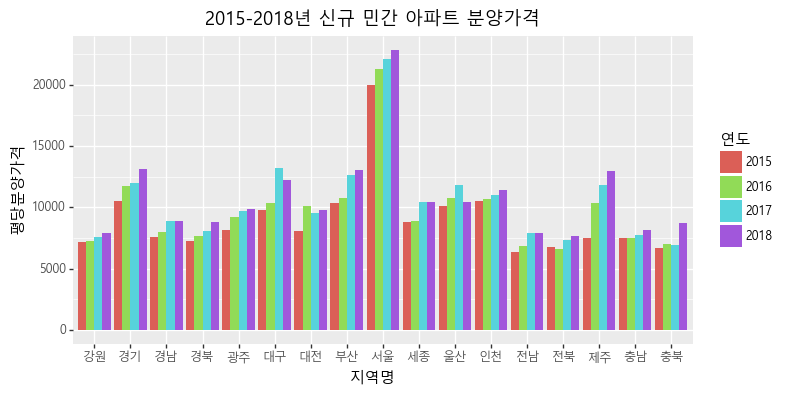

<ggplot: (153978107450)>

In [87]:
(ggplot(region_year_all, aes(x='지역명', y='평당분양가격', fill='연도'))
+ geom_bar(stat='identity', position='dodge')
+ ggtitle('2015-2018년 신규 민간 아파트 분양가격')
+ theme(text=element_text(family='Malgun Gothic'),
       figure_size=(8,4))
)

## 지역별 평당 분양가격 합계

- 어느 정도 규모로 분양사업이 이루어졌는지 확인
- 전체 데이터로 봤을 때 서울, 경기, 부산, 제주에 분양 사업이 다른 지역에 비해 규모가 큰 것으로 보여지지만 분양가격으로 나누어 볼 필요 있음

In [39]:
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,7898.700,13646.6,9226.1,8615.900,10296.488889,12334.30,14282.400000,12589.8,22058.2,9291.700000,9974.448000,13835.622581,7567.8,7842.000000,10415.790000,8477.900000,7932.9
전용면적 60㎡이하,7195.400,12384.7,8343.0,7661.500,8517.771429,11284.70,8798.200000,10706.8,22045.7,9106.748276,8964.780000,10869.600000,6991.3,7231.500000,14700.230769,7781.800000,6969.1
전용면적 60㎡초과 85㎡이하,7228.300,11691.1,8110.2,7690.500,9175.500000,10930.70,8807.300000,11191.2,20780.9,9271.800000,10640.600000,10747.600000,6967.6,6890.900000,9943.100000,7503.800000,7044.5
전용면적 85㎡초과 102㎡이하,7685.568,12130.4,9821.9,8776.284,9296.100000,9589.14,9037.430769,11038.7,23754.4,9244.900000,8861.007692,11266.600000,7882.3,7769.583871,10739.347826,9090.033333,8170.6
전체,7196.800,11705.7,8136.7,7696.300,9166.800000,10896.70,8879.900000,11294.9,21168.9,9263.300000,10618.600000,10738.900000,6982.5,6902.200000,10253.100000,7494.200000,6994.3


## 규모별

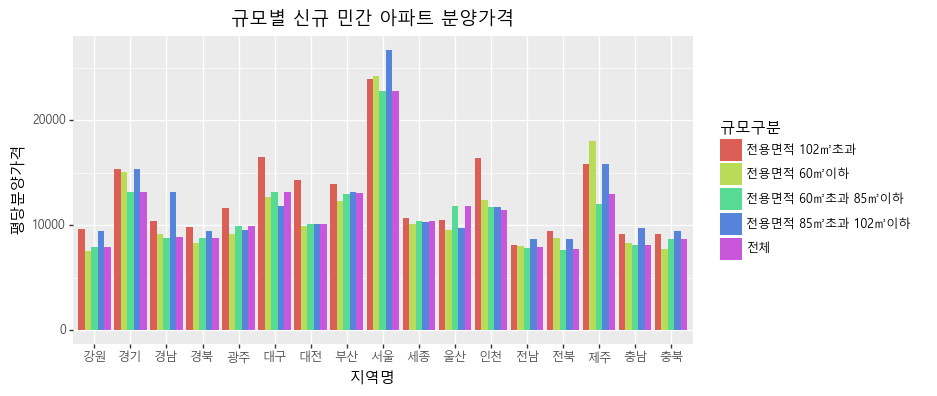

<ggplot: (153973393146)>

In [48]:
# 서울의 경우 전용면적 85m* 초과 102m*이하가 가장 비싸게 나옴
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
+ geom_bar(stat='identity', position='dodge')
+ ggtitle('규모별 신규 민간 아파트 분양가격')
+ theme(text=element_text(family='Malgun Gothic'), # 폰트 확인
        figure_size=(8,4))
)

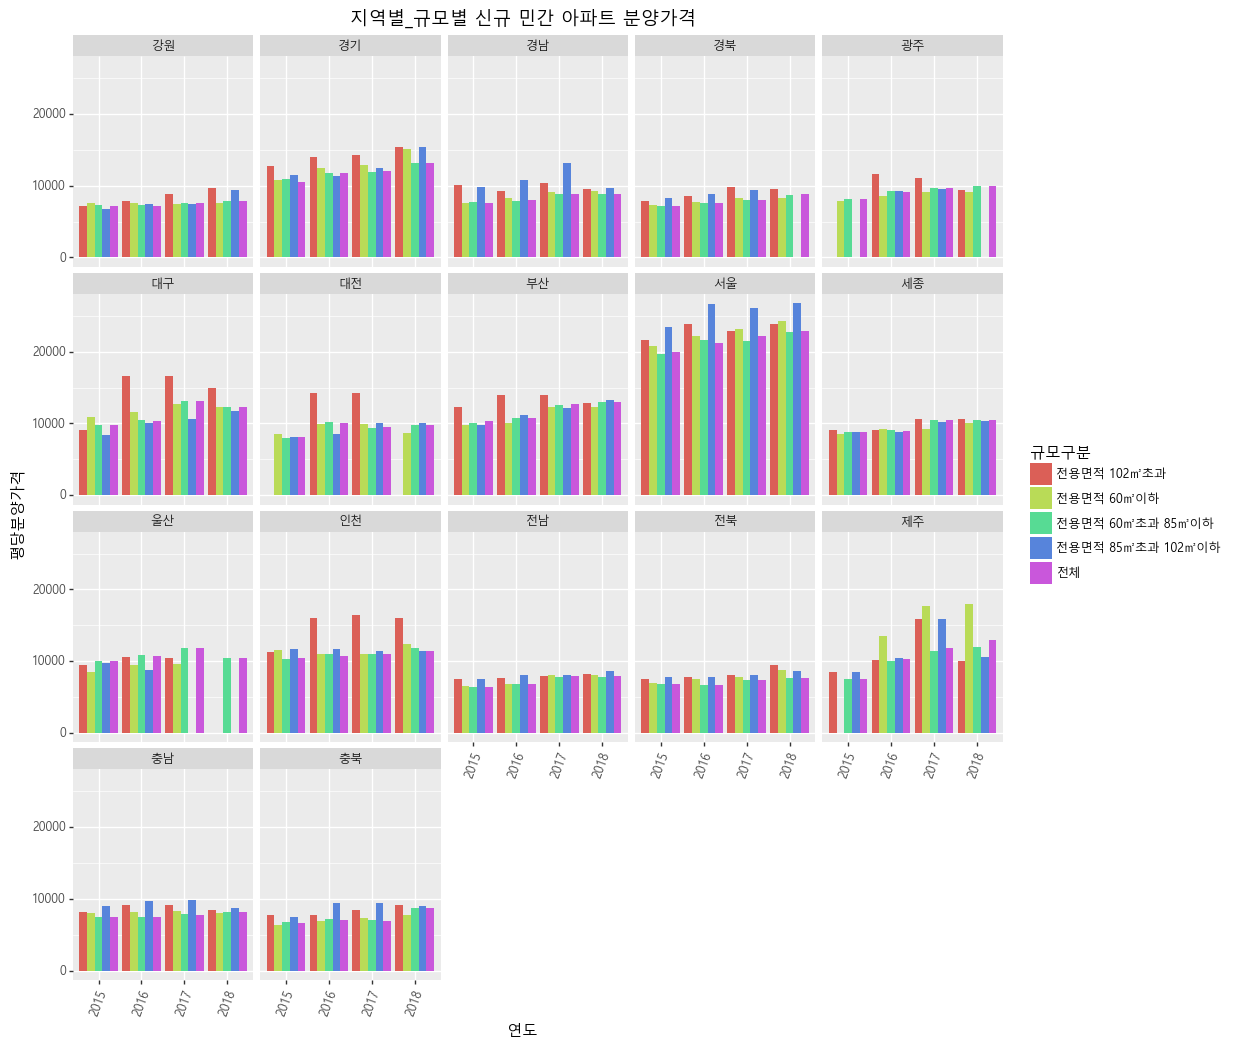

<ggplot: (153973092578)>

In [60]:
# 위 그래프를 지역별로 나누기
(ggplot(pre_sale)
+ aes(x='연도', y='평당분양가격', fill='규모구분')
+ geom_bar(stat='identity', position='dodge')
+ ggtitle('지역별_규모별 신규 민간 아파트 분양가격')
+facet_wrap('지역명')
+theme(text=element_text(family='Malgun Gothic'),
      axis_text_x=element_text(rotation=70),
      figure_size=(12,12))
)

# 그래프 빈곳 -> 결측치가 있음을 확인할 수 있다.

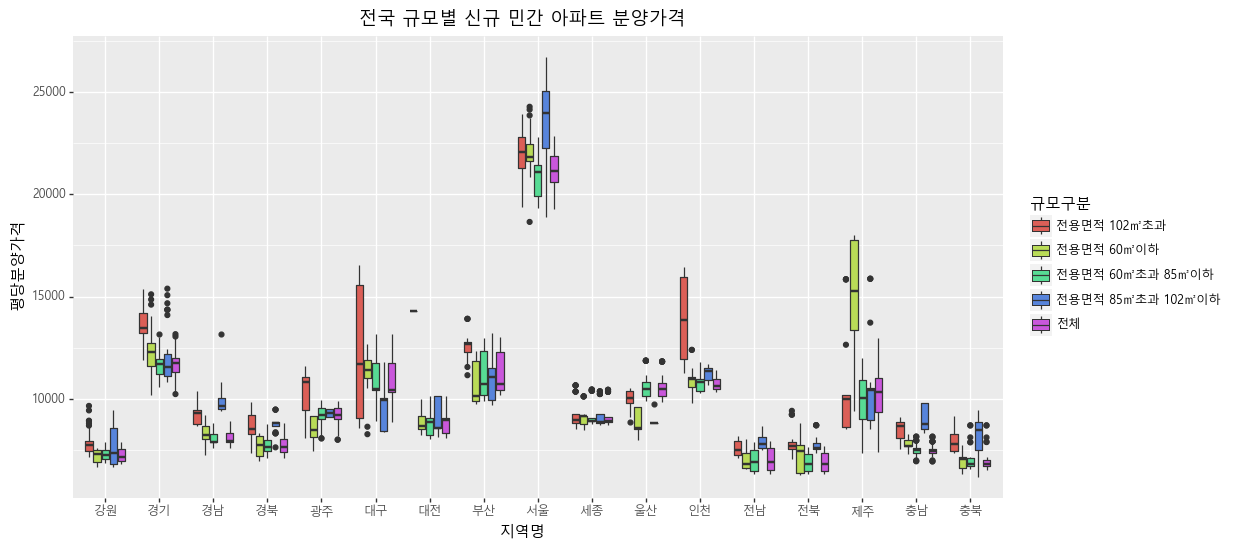

<ggplot: (153974262745)>

In [54]:
# 박스플롯 그리기
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
+ geom_boxplot()
+ ggtitle('전국 규모별 신규 민간 아파트 분양가격')
+ theme(text=element_text(family='Malgun Gothic'),
     figure_size=(12, 6))
)

# 박스플롯으로 시각화하면 변동폭을 더 잘 비교할 수 있다.

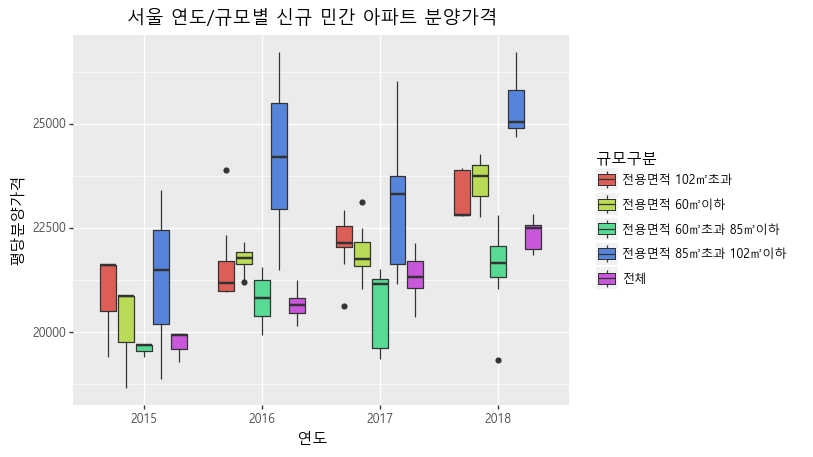

<ggplot: (153975975042)>

In [56]:
# 서울 연도/규모별 신규 민간 아파트 분양가격
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
+ aes(x='연도', y='평당분양가격', fill='규모구분')
+ ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
+ geom_boxplot()
+ theme(text=element_text(family='Malgun Gothic'))
)

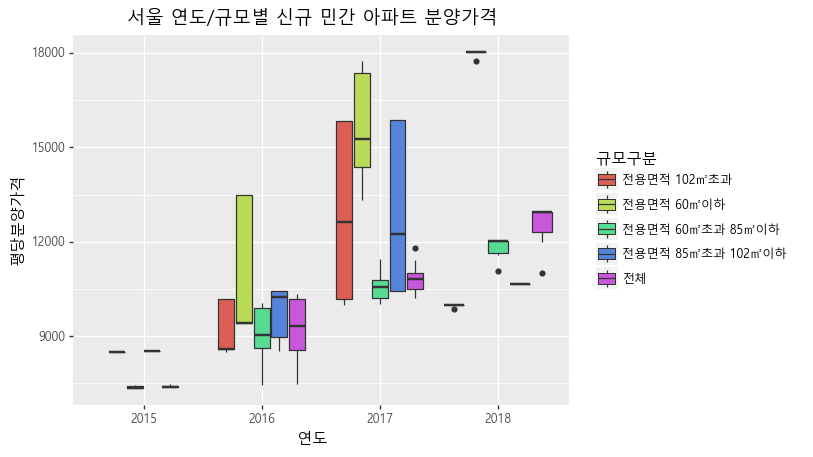

<ggplot: (153973424409)>

In [57]:
# 2015년에서 2018년까지 분양가 차이가 가장 컸던 제주만 떼서 보기
pre_sale_jeju = pre_sale.loc[pre_sale['지역명']=='제주']
(ggplot(pre_sale_jeju)
+ aes(x='연도', y='평당분양가격', fill='규모구분')
+ ggtitle('제주 연도/규모별 신규 민간 아파트 분양가격')
+ geom_boxplot()
+ theme(text=element_text(family='Malgun Gothic'))
)

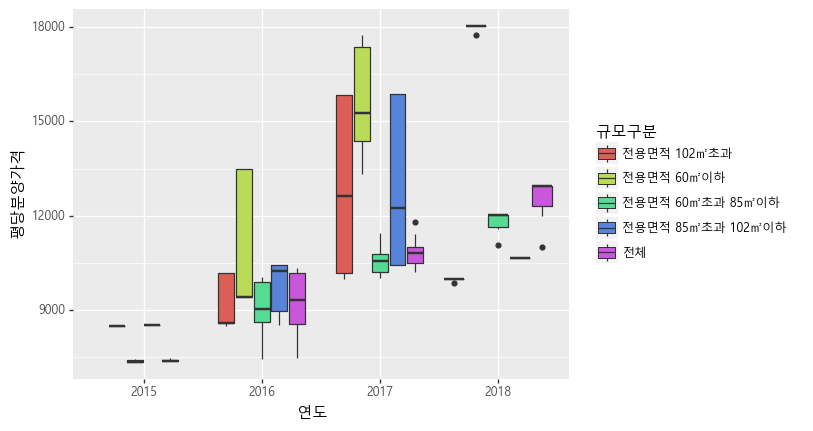

<ggplot: (153976692730)>

In [58]:
(ggplot(pre_sale.loc[pre_sale['지역명']=='제주'])
+ aes(x='연도', y='평당분양가격', fill='규모구분')
+ geom_boxplot()
+ theme(text=element_text(family='Malgun Gothic'))
)

# 2015년과 2018년에서 - 로 보이는 부분 
# -> '지역별_규모별 신규 민간 아파트 분양가격'그래프를 확인해 보면 변동이 거의 없는 것을 확인할 수 있다.

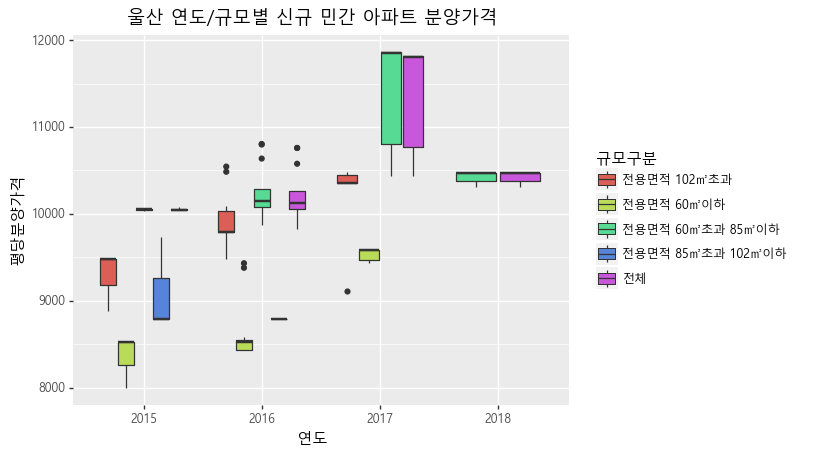

<ggplot: (153975979150)>

In [59]:
# 2015년에서 2018년까지 분양가 차이가 가장 적었던 울산 데이터 보기
# 실제로는 분양가 차이가 적은 것이 아니라 결측치로 인해 분양가 차이가 적게 보이는 것
# 울산은 결측치가 많았다.

(ggplot(pre_sale.loc[pre_sale['지역명']=='울산'])
+ aes(x='연도', y='평당분양가격', fill='규모구분')
+ ggtitle('울산 연도/규모별 신규 민간 아파트 분양가격')
+ geom_boxplot()
+ theme(text=element_text(family='Malgun Gothic'))
)

## Tidy Data 만들기

### 2013년 12월_2015년 9월 3.3m^2당 분양가격

- 2015년 10월부터 2018년 4월까지 데이터는 평당 분양가로 조정을 해주었는데 이 데이터는 평당 분양가가 들어있다.
- 지역별_3.3㎡당_평균_분양갸격_천원__15.09월.csv 활용하기

In [91]:
df = pd.read_csv('data/apt_price/지역별_3.3㎡당_평균_분양가격_천원__15.09월.csv', 
                encoding='euc-kr', skiprows=1,header=0)
df.shape

(23, 27)

In [92]:
# pandas에서 보기 쉽게 컬럼 변경하기
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,...,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [93]:
# iloc = integer location 
# 데이터프레임의 행이나 컬럼의 순서를 나타내는 정수로 특정값을 추출한다.
# iloc: 숫자로 데이터가 있는 위치(순서)에 접근
# df.iloc[0,2] -> 0번쨰 행, 2번째 컬럼
# loc는 컬럼명을 직접 입력하거나 조건식을 써서 사람이 앍기 좋은 방법으로 데이터에 접근

year = df.iloc[0]  
month = df.iloc[1]

In [94]:
# 결측치 채우기
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [96]:
month

Unnamed: 0        시도
Unnamed: 1       시군구
Unnamed: 2       12월
Unnamed: 3        1월
Unnamed: 4        2월
Unnamed: 5        3월
Unnamed: 6        4월
Unnamed: 7        5월
Unnamed: 8        6월
Unnamed: 9        7월
Unnamed: 10       8월
Unnamed: 11       9월
Unnamed: 12      10월
Unnamed: 13      11월
Unnamed: 14      12월
Unnamed: 15       1월
Unnamed: 16       2월
Unnamed: 17       3월
Unnamed: 18       4월
Unnamed: 19       5월
Unnamed: 20       6월
Unnamed: 21       7월
Unnamed: 22       8월
Unnamed: 23       9월
Unnamed: 24      전월비
Unnamed: 25     전년말비
Unnamed: 26    전년동월비
Name: 1, dtype: object

In [95]:
# 컬럼을 새로 만들기 위해 0번째 행과 1번째 행 합치기
for i, y in enumerate(year):
    if i > 2 and i < 15:
        year[i] = ' '.join(['2014년', month[i]])
    elif i >= 15:
        year[i] = ' '.join(['2015년', month[i]])
    elif i == 2: 
        year[i] = ' '.join([year[i], month[i]])
    elif i == 1:
        year[i] = '시군구'
    
print(year)

Unnamed: 0              구분
Unnamed: 1             시군구
Unnamed: 2       2013년 12월
Unnamed: 3        2014년 1월
Unnamed: 4        2014년 2월
Unnamed: 5        2014년 3월
Unnamed: 6        2014년 4월
Unnamed: 7        2014년 5월
Unnamed: 8        2014년 6월
Unnamed: 9        2014년 7월
Unnamed: 10       2014년 8월
Unnamed: 11       2014년 9월
Unnamed: 12      2014년 10월
Unnamed: 13      2014년 11월
Unnamed: 14      2014년 12월
Unnamed: 15       2015년 1월
Unnamed: 16       2015년 2월
Unnamed: 17       2015년 3월
Unnamed: 18       2015년 4월
Unnamed: 19       2015년 5월
Unnamed: 20       2015년 6월
Unnamed: 21       2015년 7월
Unnamed: 22       2015년 8월
Unnamed: 23       2015년 9월
Unnamed: 24      2015년 전월비
Unnamed: 25     2015년 전년말비
Unnamed: 26    2015년 전년동월비
Name: 0, dtype: object


In [98]:
df.columns = year

In [99]:
df = df.drop(df.index[[0,1]])
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,...,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333",...,"8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742",...,"19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457",...,"9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360",...,"8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974",...,"9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612",...,"7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333",...,"8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153",...,"8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,NaN,NaN,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648",...,"8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,NaN,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124",...,"10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [100]:
# 지역 컬럼을 새로 만들어 시도와 시군구를 합치기
df['구분'] = df['구분'].fillna('')
df['시군구'] = df['시군구'].fillna('')

In [103]:
df['지역'] = df['구분'] + df['시군구']
df['지역']

2          전국
3          서울
4     6대광역시부산
5          대구
6          인천
7          광주
8          대전
9          울산
10           
11         경기
12        수도권
13         세종
14       지방강원
15         충북
16         충남
17         전북
18         전남
19         경북
20         경남
21         제주
22           
Name: 지역, dtype: object

In [104]:
melt_columns = df.columns.copy()
melt_columns

Index(['구분', '시군구', '2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월', '2014년 9월',
       '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월', '2015년 2월',
       '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월', '2015년 7월', '2015년 8월',
       '2015년 9월', '2015년 전월비', '2015년 전년말비', '2015년 전년동월비', '지역'],
      dtype='object', name=0)

In [105]:
df_2013_2015 = pd.melt(df, id_vars=['지역'], value_vars=['2013년 12월', '2014년 1월', '2014년 2월', '2014년 3월',
       '2014년 4월', '2014년 5월', '2014년 6월', '2014년 7월', '2014년 8월',
       '2014년 9월', '2014년 10월', '2014년 11월', '2014년 12월', '2015년 1월',
       '2015년 2월', '2015년 3월', '2015년 4월', '2015년 5월', '2015년 6월',
       '2015년 7월', '2015년 8월', '2015년 9월'])
df_2013_2015.head()

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [106]:
df_2013_2015.columns = ['지역', '기간', '분양가']
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


In [107]:
df_2013_2015['연도'] = df_2013_2015['기간'].apply(
    lambda year_month : year_month.split('년')[0])
df_2013_2015['월'] = df_2013_2015['기간'].apply(
    lambda year_month : re.sub('월', '', year_month.split('년')[1]).strip())

In [108]:
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,6대광역시부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


### 지역명 강원과 부산 정리

In [109]:
df_2013_2015['지역'].value_counts()

           44
전국         22
세종         22
경남         22
경북         22
전남         22
전북         22
충남         22
충북         22
지방강원       22
수도권        22
서울         22
경기         22
울산         22
대전         22
광주         22
인천         22
대구         22
6대광역시부산    22
제주         22
Name: 지역, dtype: int64

In [110]:
df_2013_2015['지역'] = df_2013_2015['지역'].apply(
    lambda x: re.sub('6대광역시부산','부산', x))
df_2013_2015['지역'] = df_2013_2015['지역'].apply(
    lambda x: re.sub('지방강원','강원', x))
df_2013_2015['지역'].value_counts()

       44
전국     22
세종     22
경남     22
경북     22
전남     22
전북     22
충남     22
충북     22
강원     22
수도권    22
서울     22
경기     22
울산     22
대전     22
광주     22
인천     22
대구     22
부산     22
제주     22
Name: 지역, dtype: int64

In [111]:
df_2013_2015.describe()

,지역,기간,분양가,연도,월
count,462,462,462,462,462
unique,20,22,371,3,12
top,,2013년 12월,"8,067",2014,12
freq,44,21,7,252,42


In [112]:
df_2013_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      462 non-null    object
 1   기간      462 non-null    object
 2   분양가     462 non-null    object
 3   연도      462 non-null    object
 4   월       462 non-null    object
dtypes: object(5)
memory usage: 18.2+ KB


In [113]:
df_2013_2015['분양가격'] = df_2013_2015['분양가'].str.replace(',', '').astype(int)

## 2013년 12월 부터 2015년 9월까지의 데이터 시각화 하기

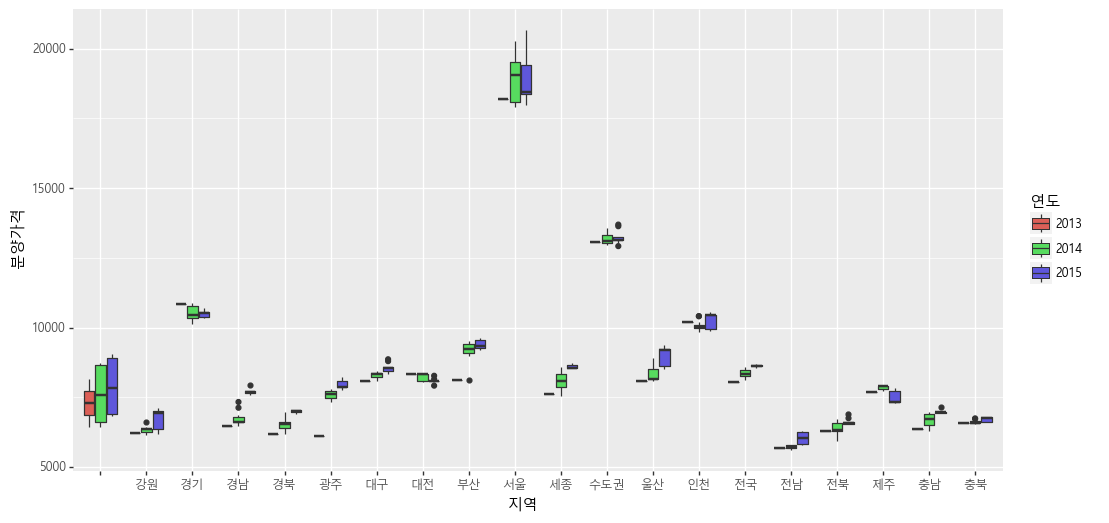

<ggplot: (153971840311)>

In [114]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
+ geom_boxplot()
+ theme(text=element_text(family='Malgun Gothic'),
       figure_size=(12,6))
)

## 2013년부터 2018년 7월까지 데이터를 합칠 준비 완료

In [115]:
df_2015_2018 = pre_sale.loc[pre_sale['규모구분']=='전체']
print(df_2015_2018.shape)
df_2015_2018

(578, 7)


,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,"5,841","19,275"
5,인천,전체,2015,10,3163,"3,163","10,438"
10,경기,전체,2015,10,3138,"3,138","10,355"
15,부산,전체,2015,10,3112,"3,112","10,270"
20,대구,전체,2015,10,2682,"2,682","8,851"
...,...,...,...,...,...,...,...
2865,전북,전체,2018,7,2333,"2,333","7,699"
2870,전남,전체,2018,7,2357,"2,357","7,778"
2875,경북,전체,2018,7,2674,"2,674","8,824"
2880,경남,전체,2018,7,2696,"2,696","8,897"


In [116]:
df_2013_2015.columns

Index(['지역', '기간', '분양가', '연도', '월', '분양가격'], dtype='object')

In [117]:
df_2013_2015_prepare = df_2013_2015[['지역', '연도', '월', '분양가격']]
df_2013_2015_prepare.head()

,지역,연도,월,분양가격
0,전국,2013,12,8059
1,서울,2013,12,18189
2,부산,2013,12,8111
3,대구,2013,12,8080
4,인천,2013,12,10204


In [118]:
df_2013_2015_prepare.columns = ['지역명', '연도', '월', '평당분양가격']

In [119]:
df_2015_2018.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)', '분양가격', '평당분양가격'], dtype='object')

In [120]:
df_2015_2018_prepare = df_2015_2018[['지역명', '연도', '월', '평당분양가격']]
df_2015_2018_prepare.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,"19,275"
5,인천,2015,10,"10,438"
10,경기,2015,10,"10,355"
15,부산,2015,10,"10,270"
20,대구,2015,10,"8,851"


In [121]:
df_2015_2018_prepare.describe()

,평당분양가격
count,561
mean,"9,729"
std,"3,367"
min,"6,300"
25%,"7,498"
50%,"8,973"
75%,"10,560"
max,"22,833"


In [122]:
df_2013_2018 = pd.concat([df_2013_2015_prepare, df_2015_2018_prepare])
df_2013_2018.shape

(1040, 4)

In [123]:
df_2013_2018.head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
1,서울,2013,12,"18,189"
2,부산,2013,12,"8,111"
3,대구,2013,12,"8,080"
4,인천,2013,12,"10,204"


In [124]:
df_2013_2018.tail()

,지역명,연도,월,평당분양가격
2865,전북,2018,7,"7,699"
2870,전남,2018,7,"7,778"
2875,경북,2018,7,"8,824"
2880,경남,2018,7,"8,897"
2885,제주,2018,7,"11,002"


In [125]:
df_2013_2015_region= df_2013_2015_prepare['지역명'].unique()
df_2013_2015_region

array(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '', '경기', '수도권',
       '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [126]:
df_2015_2018_region = df_2015_2018_prepare['지역명'].unique()
df_2015_2018_region

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [127]:
exclude_region = [region for region in df_2013_2015_region if not region in df_2015_2018_region] 
exclude_region

['전국', '', '수도권']

In [128]:
df_2013_2018.shape

(1040, 4)

In [129]:
df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].head()

,지역명,연도,월,평당분양가격
0,전국,2013,12,"8,059"
10,수도권,2013,12,"13,083"
21,전국,2014,1,"8,130"
31,수도권,2014,1,"12,995"
42,전국,2014,2,"8,195"


In [130]:
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'].str.match('전국|수도권')].index, axis=0, inplace=True)
df_2013_2018.drop(df_2013_2018.loc[df_2013_2018['지역명'] == ''].index, axis=0, inplace=True)

## 2013년 12월~2018년 7월 전국 신규 민간 아파트 분양가격 동향 시각화

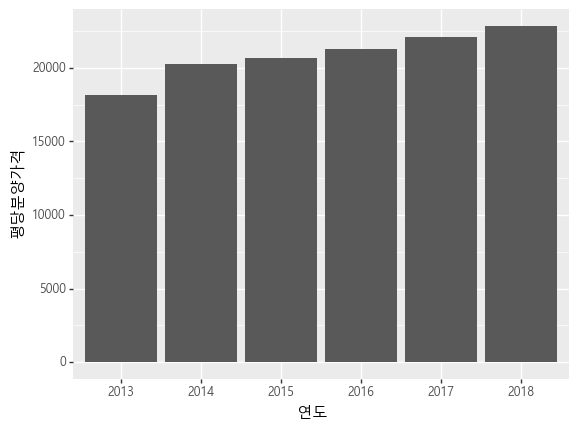

<ggplot: (153973079028)>

In [133]:
(ggplot(df_2013_2018, aes(x='연도', y='평당분양가격'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='Malgun Gothic'))
)

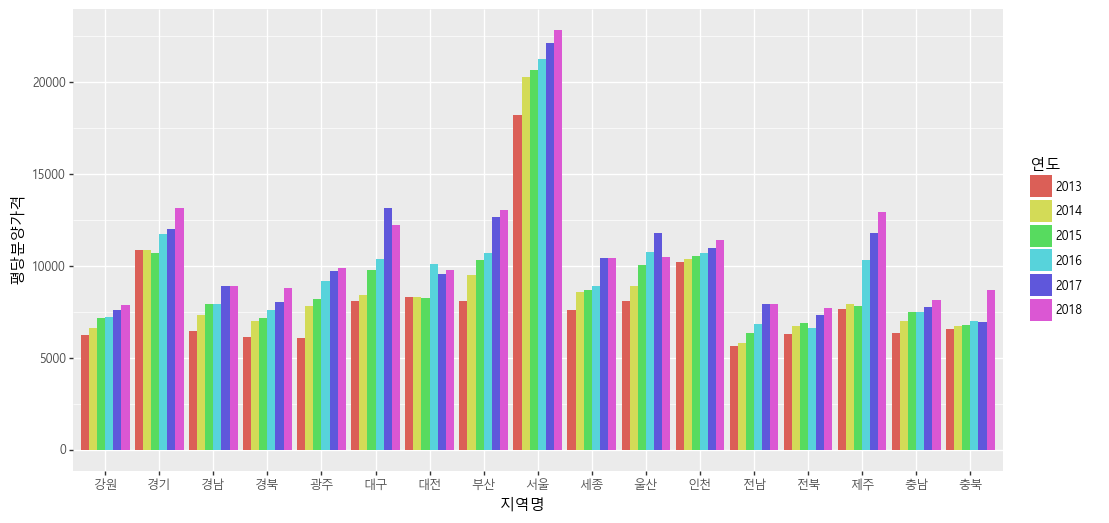

<ggplot: (153972692297)>

In [134]:
(ggplot(df_2013_2018, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='Malgun Gothic'),
         figure_size=(12, 6))
)

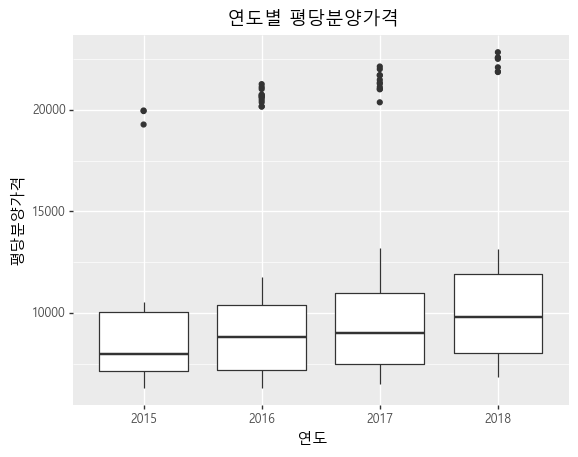

<ggplot: (153978996420)>

In [135]:
(ggplot(df_2015_2018_prepare)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

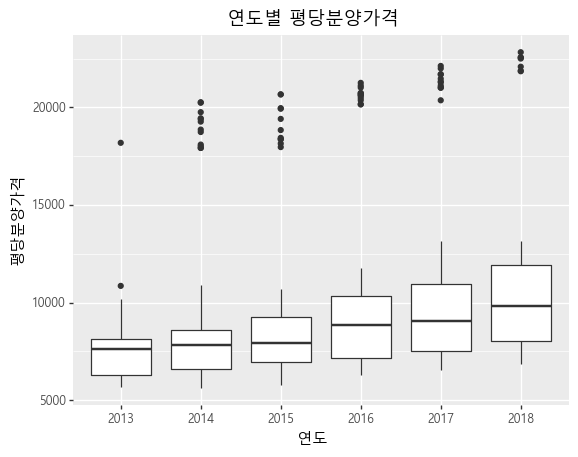

<ggplot: (153979039356)>

In [136]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + ggtitle('연도별 평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

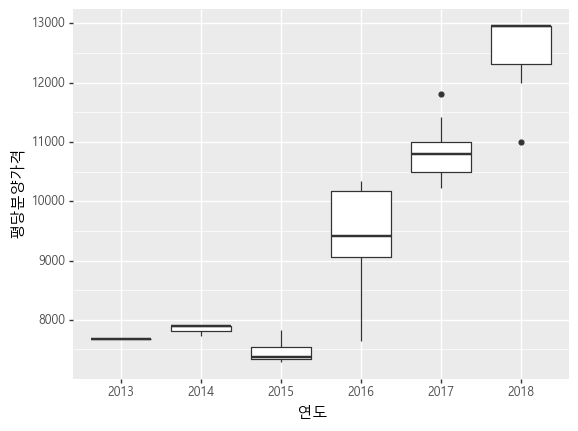

<ggplot: (153981782435)>

In [139]:
df_2013_2018_jeju = df_2013_2018.loc[df_2013_2018['지역명'] == '제주']
(ggplot(df_2013_2018_jeju)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)

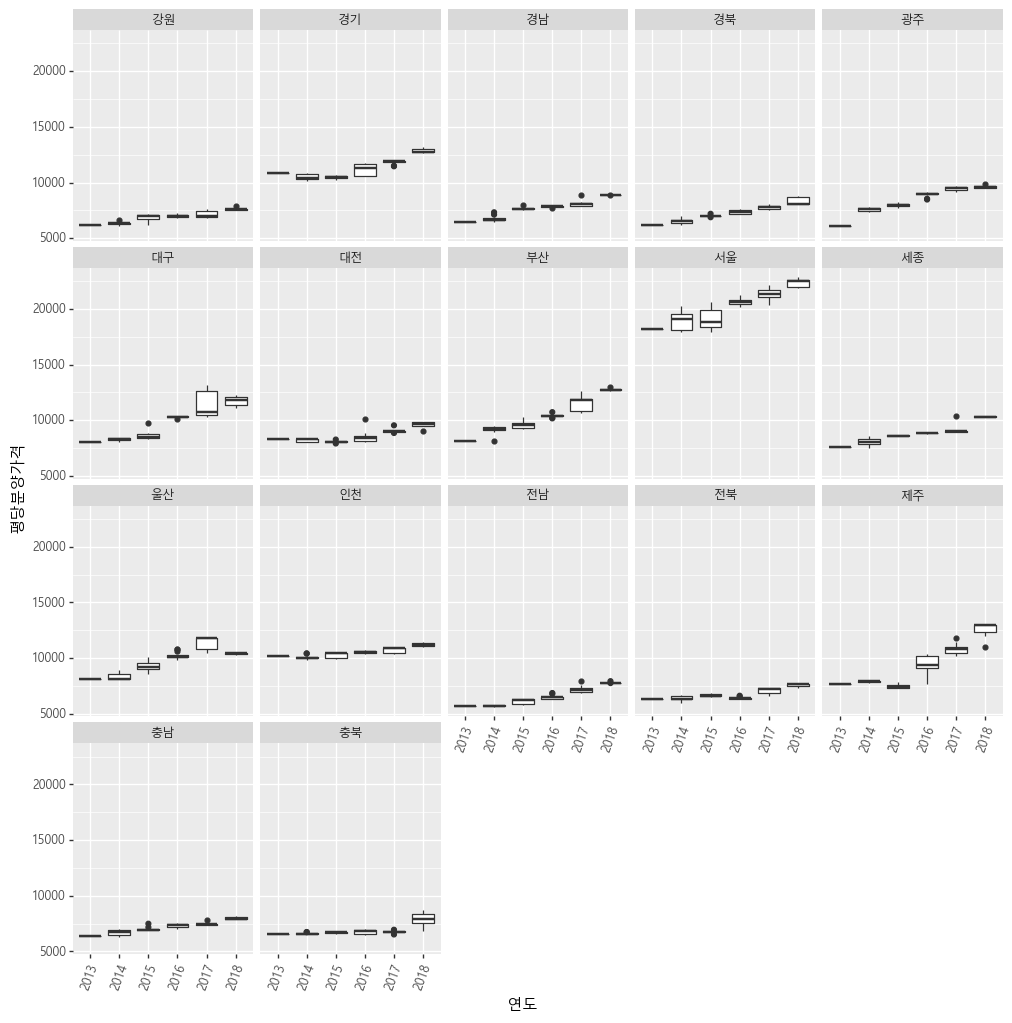

<ggplot: (153979004308)>

In [138]:
(ggplot(df_2013_2018)
 + aes(x='연도', y='평당분양가격')
 + geom_boxplot()
 + facet_wrap('지역명')
 + theme(text=element_text(family='Malgun Gothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)